# Synthia

Testing of data preparation and loading methods for use of Synthia dataset in detectron2

## Imports

In [1]:
import sys

In [2]:
sys.path.append("../") # go to parent dir

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import cv2
import random
from PIL import Image

In [7]:
from utils.prepare_data import prepare_synthia
from utils.data import get_synthia_dataset, IGNORE_LABEL

## Prepare Data

In [8]:
input_path = '/data/kianboon/synthia'
output_path = '/data/kianboon/synthia/detectron2'

In [10]:
prepare_synthia(Path(input_path), Path(output_path))

9400it [08:48, 17.79it/s]


## Load Data

In [11]:
DatasetCatalog.register('synthia', lambda: get_synthia_dataset(Path(input_path), Path(output_path)))

In [12]:
cityscape_classes = MetadataCatalog.get('cityscapes_fine_sem_seg_train').stuff_classes
MetadataCatalog.get('synthia').stuff_classes = cityscape_classes
MetadataCatalog.get('synthia').ignore_label = IGNORE_LABEL

### Verify Data Loading

In [13]:
synthia_metadata = MetadataCatalog.get("synthia")

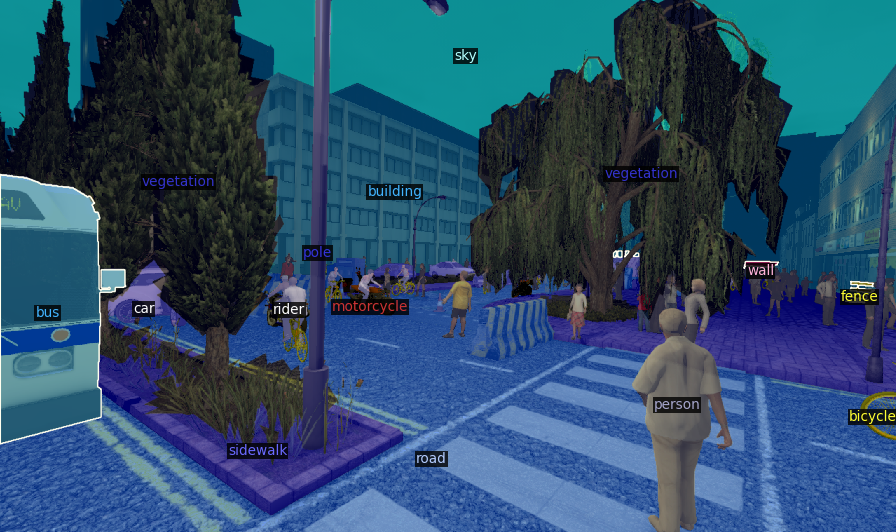

In [14]:
dataset_dicts = get_synthia_dataset(Path(input_path), Path(output_path))

random_sample = random.sample(dataset_dicts, 1)[0]
img = cv2.imread(random_sample["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=synthia_metadata, scale=0.7)
out = visualizer.draw_dataset_dict(random_sample)
Image.fromarray(out.get_image())

In [18]:
synthia_metadata.stuff_classes

['road',
 'sidewalk',
 'building',
 'wall',
 'fence',
 'pole',
 'traffic light',
 'traffic sign',
 'vegetation',
 'terrain',
 'sky',
 'person',
 'rider',
 'car',
 'truck',
 'bus',
 'train',
 'motorcycle',
 'bicycle']

In [15]:
out.get_image().shape

(532, 896, 3)

__Label visualization from SYNTHIA__

In [16]:
label_viz_path = Path(input_path) / 'RAND_CITYSCAPES/GT/COLOR' / Path(random_sample["file_name"]).name
label_viz_path

PosixPath('/data/kianboon/synthia/RAND_CITYSCAPES/GT/COLOR/0001698.png')

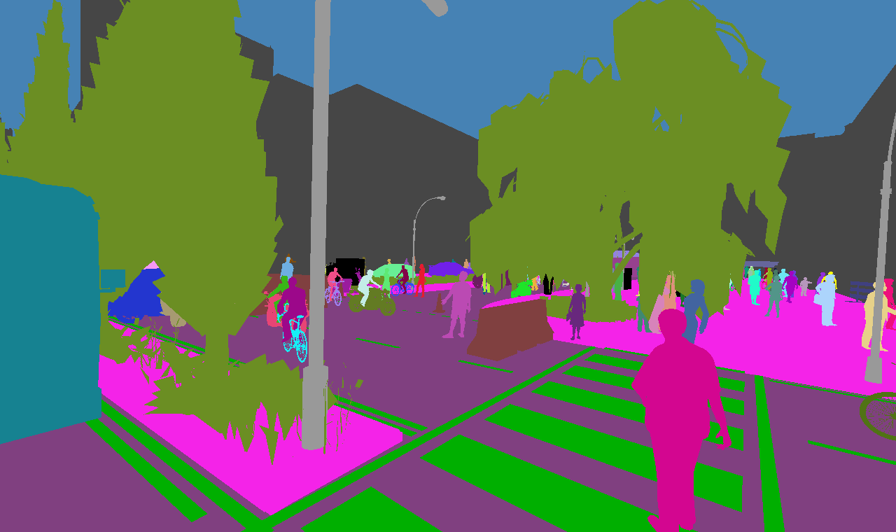

In [17]:
im = Image.open(label_viz_path)
im.thumbnail([i*0.7 for i in im.size])
im